In [ ]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

In [ ]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

15405/15405 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

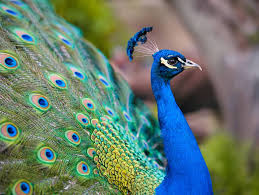

In [ ]:
image_path = tf.keras.utils.get_file('peacock.jpg', 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUTExMWFRUXGBUYFRUXGBYVFRUWFxUWFxcXFRUYHSggGBolGxUXIjEiJikrLi4uGB8zODMsNygtLi4BCgoKDg0OGxAQGy0lICUtLS0tLS0tLS0tLy0vLS0tLS0vLS0tLS0tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAMMBAwMBEQACEQEDEQH/xAAbAAADAQEBAQEAAAAAAAAAAAADBAUCBgEAB//EADoQAAIBAwMCBAMHAwQCAwEBAAECEQADIQQSMUFRBSJhcROBkQYyQqGxwfAUI1JictHhkvEVgsKyM//EABsBAAIDAQEBAAAAAAAAAAAAAAIDAAEEBQYH/8QAMxEAAgEDAwIEBAYCAwEBAAAAAAECAxEhBBIxQVEFEyJhcYGR8BQyobHB0SPhQlLxBhX/2gAMAwEAAhEDEQA/APrXgNxQCjbl7f8AFFKmo8M5lOdTapSi7dzV3TuD99h7E4+XWqp6mdJ2aujRF06itF2Z8+g+KsMwPr1ra9Rpq0eLPsY60JUfU3b3FV0zWiF3SOlY6tPbwadLrFW9MuRrVEgBgf51FVFsGvp0ncxeYMmSKY8mSVJcokvp4n0rk6ui1k2aapf0sV+LXMbOgkJ3jmiXBYWwc0E0Vco2rtZ5RLuP2TikPDCNpZrRSmQOmnWurRqEG7dsVsiw0whtiiZZ8oAoCBRdAookPDqxTLkMtqAau5CR4lpw1QojrZ2mrRTRX0hogRt0xVkJGsFWWhQL1qFlTRayMVQVx/eGqEJviOkxVEI6WINASwwLkVaZTM3lDCiTuAT20gqBHYW/GRsKhzbJ6iDtPpP6VKVVQnunHcjlRU6a2U3ZAdNqdTPmKX1/yXDj3FdqMdFqI/45bX2ZhrQqJ3kvmgl8MpDDA6g9K5NbTbHeOTTSr7n5VUYCC6pnkdf3oISb5DnpUsxMWH2yrD59J70TxkfCruW2Yq2i2sYODkdRVJq4uVPbyD1ukIG4cdaGvDfCwqnaM7kX4REzXn6lOUXk6sWmsGFt1aQMjYtVdgbmwIpU4Fpjdi7WSURhRs3KqGCmGrbRlkpMLaaurTeBsRxeKaGeNFSxAFw1EQVuGrJY8Vqshts1ZQne01WQ8sYNGgGipbyKIEV1WjmrLFLujioFcW+CQaog5ZuEVCw9y4CKhCfeQUDQcRO+tUVJCm8g1ELsFDijuWfHRy5Iws8YE/T1BoIy2YZiVpD2kba0gMB0IOR6GlzpRk90GE7WtJFgXRchWz/O9Op15pbTDPRR370Z1N34JDRKkxj85qKom/cdT3p2fA1qyCkrkxgft+VMkXOF8oU8LsOVIYyenpQRj3C8zchq0hgj8qdGzwZqj25sI3dECSCIn6Gs9ejHiSCpVW8wZD1thrRIgx0Nc2rpZRyso0w1EZPbLDFE1omKSoDgr35qOJEH0b5rPOmXctWUxSvLsS5tqNYCR6rxW2nUwMQwmorXGQxHr3aaXYWe9UJYA1yoWeK9WVYdsmrKDNbqF2Er9qDRgtBdNcohZRQTVkM3LQNQgu+lFQIQ1VuBULJr6kipchoXtwqmWmfW7RJqrBNmNXpKjAFfg0Jdhw2dzTHnMHZwSZg7e+ZPzqJb8vkwSpyj+UqeF+Gi7G0+/SPlVqKTsjHOpNO1yxb+zzrw01VSI6Eq0fzxZ5qdETAK/dz70CkvmG5qSwI2rxDMCJXHypt28MGD24DOQpmD7ClTckx8IxYEIzHcmD1H/VX6nkXNxhiSwUrd/csOokda00qifpqFOlFrdAFqNKpEEYNMlQdN3WUZpNSxI5rxn7OAedKGpo4TV4mf8XOi7co5lmIMGuPUhtdmdanUVSKkinoLgrLLkMtW79JkRIK94RS2xsUDF2a0Ur2GWCoa1wZLhGFaYyDTJviOsW2MnMHavVo7Vt0+ndV9l1YnUaiNKPv2Oeb7SMw/toC3mgSW4aOnpTpUKUYX3XEqvVlK1kdHpyYE84n361iaV8G1J2yUtNQkH0FQhm/YkVaZGiaw2mmJipIoaa9irADb6ssxceoWha4s1QRF8S0lQghpQQaG5C7pIokS5vVKIq8FNkN3yaHBW4o3ka365leSMYJx8vXmgeBXOCn4Tqrb5B2P3Bgz1levtRbuqMWopuS7Mv8AiGsvrZb4QVrwEqDO1h1I+XSmaSVGpWUarsn+438bV8m1vUvndd/ic14b9pr7Ps1Nof7lBUr7g8iu9X8DpThek7P9Dj1Nem7zt9LP/ZU1oUTMEETMYI9ulef2Nc8o1QrWlsf2gVq6D5CM/hPG4elGkpI1q58LhU+cR2YcfOs6aTKqbpRsW7a2mt7nYIw/F0Pzp0X572pAUqe2G5StL34FtQpUEYIPB5H1ooSnT9EuBFaLnlYl2/omXLw2FCc/zFOpz2iHBVo55ON8U8PZWkDH6VydbJOVzo6Oi6cLMWt4rmtmwat6ihYSQ5Zuk0VOCuMG0Fa1GyKYwlA3ZlANb4iqyimbmIX3/wCga7fhuglXanL8v7mHWazyotR579jhksHUXDce7sUkhTwWgGQD+XWeK6Op3zl6Py8KwqjsgtkueXf+TpPs1p0FjagMKzAk9zEn2Ij9K5lWG1nWoS3QuV1sxSmNHbC0LKKFkVRY2LdQghrtLVoponISDTEKaHrTTVgm7lvFWQEqRUCuA1duRVFkd7EGhYSPDfK1RUkCua8nFBKTFE93zVJlHUWrqsoBAjoDM5xz0OYnjFHe4GUT7/ho3F0kdTl4wONoPPy7UK3dCpK45oPHA6qPjJMDb5mGekb7fNSS38rIipSuUbOuZsXFtMe7GG/L/ighqtRQe2MpJfEVPTRqcqLfurjlxhAG2MYAMj5E0UNRuVvcD8M/N3z7Wx7CPilggB16GRGe+KaqjTNDpbeDA8R+La3LCuOQe45imOCnlAVJYwY0V+5c8qie4PBHqDSVGdOSnDDQ2mo1oWY54bYCkhTtHW03AP8Apnj2rprxSjqYbK0bTXVGGrpJUZXTwL622C+48SRjuKRKGx3E0K29brcsl3b5tuQ+V6d4pNanGfJtp1JQdugPXeHK677XzFcmtpduYmtTTIatBisjiNRU0hoYSaYVyklkmuhCEpIG585Kgk4gE0cKLc0n3QFSVotnCXTcvOi22YuWPeQByZjgGc8V6WvXVN+h2VznUaTlfcr4Oxt/ZlGtKvw1VgZMEk+vBGTWF6l7207rodGGnTgk1Z9R7w7wxbKhE6ZMg577h/xxWd5dzXGNlYdbS+UMOP2Pt2PXruB60DQR5bWhINWWqmQdttVEPboBFEkUyLrLMGjSAZnTtVgMoIasE+ZKhYC7bqBXJGsSKphIlXJNAGwBsGptuIaPP6c0XlgnfDw3ZEBGHYm4p+pWPqYrBUjWXEv0/oio1LcC2usqQQQbbHgmGUkcQwkGKka8lkU04u0kTtV4amCpKDmFCrtMg9BnJn5in7l+aJd01YPZG87CwDgDzzG4bcSSwnHoOKfeNSNmDFDmm3GEbJ6GVz1nnn50h0drwG1uQ1ablT0PmBmRPU9qYryAi9uGS9RoPh3vipnDEL+Fo6UcZuL9hMobHuXUEXKOLybdhMFZwCeQfpWnnJcX5bwsMc1w2xdUDaYkAyATwfnWOtRzuRok9yzwEtrvWD1/IimUaj/5GWrQiqbjEjeI6UOpxDDieTW1rdEyU3dX6k3w2+1t/wAmWudUi4vBthLcrMoeK+BC4vxbfPVaGdCNan6fzITF1KE227xf6Efw255iDXLpwtOxvUtyujq9FBWutTVkNjC4n45Zm1cA5KmPeKfp5KNaLfcXqaN6TOP8D0bDVswgJbA2jjLKBB69z61s8UahJJWsZPD5boXfOb/U7izqhgEfSP05/OuXGa7HTRSt3QRDA+khgR6hoJH1pqZLkzXfaO2itatBbm9fvZ2jqGOOQT6ce9drR+FOqt1TC+/ocnVeKKLcaavbr0+Xcif/ACLwJuZmCRtAH14Az3+78q6i8O0sI2cUcuWv1UpXUmNDxG8oVirbTABdCoOJ5IHSsk/D9FPEXZ+z/g0w8Q1cPzq/y/lDuh8dR/LIDdpkHng/KuVqfDpUlug9y9uUdTT+IRqNRmtr9+GUV1dYEdCwHUtIoimhVOagpofstUBNtcqyHsTV2LQpq9NNSwSYh/8AH5qrF3Pn0VGoi5M0NCKKwFxn7e+LX9Pp91nDFwrORPw1M+YqfUAZ70OkpRqTaln9viHrKzSiouyd+Ovsn98HP/Zfx/UPIuFbg6nADejL19wMV2KvhVLUQcUluXDSt9V1R56pqpaWSleTi3mMm3803lP5nTNcVRIE23AMckK2CD3AMz6CvLxg4pxZ11L1W+/YUa0yEXADtB5EnB3GAZ9Wz6+lHaSyPaHbs3SSuxXEQZKs2QDEiCfmKfGTmrWyBJBLNwkmSA6mCCBBjp2ob2l7gO74GVggSI//ACxnvyM1cldYCjlWYhc04QOsEhi0gZmRIP1qUpNYYMntTbFtI4VTbO4A84laa4zXTApVoSVkyjoUztJx0P6UmOGFGSlGzFvE9JuOTxyO59+0VrpzaVmYnT21LnN+IaYW7nlJ6c0Mo3NDik00dJ4He3LBrPC9Ke5Dpu8LCPing6i7uU5PSj1dCLaqx68iPD6ic3Sfxse27xt4NBGWDvwpmL+p3cVGroJpIk2fD9l1rgmWGR0Jxn8q0amsqkIJLKVmzn0NPKnOd3hvA2upaeT9ayxix8sDthsU3Zgzt5OY8VuBHuHgEkggcED05zNesoVJUtLFz5t2+h56qlUrNR7/APp2g+ymm1uis6nTXPg3bdhTdW3F8Ofh7oZQwK3SR754kY85HxCrucZZ+J15aSG1OKsflniN5rk7r117rfdgFlbiCG3ZBExjt3q5V5PCdvZYDjRSXf45L3hiaZ9OLDuun1dvcF1DY02pUSwW4QPI4wu6Mxy3AZCpWpq/Ri5xpzx2Oq8L02zT2DqrvwLrg5uQbJG8qh+OnkG5dpHM1knC+V9DoUq1koyyNayzctHbcUieDgqw7qwww9qTlcmj0vgXttVoXJDdt6ISwd27RIod01wEUZRu+RULQszCpYtswok1Yth9tWUe3ypSAN6HlDuDKP8ASSvmHofkRXNp1J0Z7oSs+/8AZgmk4bHHdF9O3un0ItvRaRSdkriSFRQY+Rx8q6C8W1SVoqKv1SyJ/D6d/mU5dlKSt+mWMrbLBSg8q4CjLBTkz3rHdSfuaIRq73OfXounsGFwBSSJHUGJWCMxM9QY9TQKMlc2Ra4YfZtANtv8SCOhiCPQyF+s0xSs7oZtbVmeXEuOxYAFhLHaBLdSYiD9KqUpvoItk9TUrAIPXzIZX5icCrjJX/gjkugw6iBmIEz0PGPfNMauEsoY0FxGgMMdfTsfajhX2P1HOraZeYnxF8se1Hg6fgb5dfcUc7SW5IOppqtH8rv+5N1lsiN0HpMckcfOpcFVYytIk63TrcQxzwcZFWnZjKklswJ+Du9p9jDjIPcVVaGLlaespq1xn7UqYS4pjEj3H/unQW6nYyamDpamNWPJ7YA1NkOMNEH3FY7Wdj01OrvimJWtKymDTcWLcrhbyQKBkQvbsTVRZUlcc+GERmP4VY/QTWmjac4x7tIzVo7IOfZHCeL3CQRMT6/Wu7rJt+hHntMrPcwH2c8XuaK6L2kuhGiGnzK6zlXU8j1xHcVzammpSWGdGNepF5R2Hin2p0OpE3tCwutBdtPdCb8ZJ8hJ9mnpnFZVpKkZemd/lcL8XFq0k0cv/X/Duf2re4PuRLV0S2xiRDAfeIA5ECc8Vprufl+vFgNPGKnaObnf2PtQbVpbSrCgRsOwovoFIb9a5O6pfn9DrqkuqFz9qbjkBwr28Bk2Koj/AE7Yg9qPzJWsy1SV7oWu3lW4wRtyT5W4JBEiZ6iYPqDQhvgbt3aNCWjy41WAEs3yKK4SGPjzVopnqmaIENaSoCHCVCHDut5J2S6gxt3eYf8A0nP/AGO4rFKklm5UoexQ01iQGQ+YHIyykRMZaFfkVWyD4yKcU+Fkr2I3GAEYGGDnbBPSWYEjjMdeaJ010wSMWuRy0itxAbgqv3GHXIf9aGLtj7/ctIV06ILmABMBlmdpII74MH9Kp0+vQZGaHrTDdM+hOJBH+RHEme2Io4r02+gnUxlicfmdEmjskSVDTBnPXOB0qnGLD02l86PmN29hfU6G3Hl+nUe3f8j70Et9N3fBcqTp5i7r2ZzGp3W33CSvUrnjp3opJSVwLxlG6MeMWLeoZLlu41q8q7d+6AwBwJHBrsaDxKnQiqVVen6/+mDVUZt74ffz6D39RcFtfjZcEAn/ACEfe9xV6qFCdR+Q8Wv8Gc+U50dk58ttWve67k3UXTbdb0Ha0LdU9D/kK58lix0Umy1a0Ni6qsLgW5J2yefSn0K0pRaccLlmf/8APt6oytPou5O8f0jDTsp5U/kf/dOoRteJWoquVJSfMXk5j7LauGNskjOKw1YOM2dbSzTgrHX2wHwfvD86ieDdCe4Vv2ooWNSA24FUFYx4s4/p7v8Asb9K06R/54fEz6tf4JfA4C/DcY9YB/8Add/UQUsxPOU248k25adcRj0xK1zakakFZo1KUJZv/wCh/C7F64fJ/bX8TnP/AIjvSfxVSkrRwaKWljVeclyzYSyPLlj952yzfPoPQVinOU3eTudSnThSVooAbpY0AV7jltoFQIy+pg1AXIraLUyKNC2OsasGx8GqyBFaiRTDW3ogRk34FQo0NeKgIk2l3ZDS0YJkmcsswfOuIJBwO9ZXC+Y/7KUwDBQF3DbcyRthlIPMDCzIOfXuaUppcfXuVJroE/qsDcQsdeWJ/wB5MT8+lTcpckS7hvjyw84JzteRgnngEfIk0fIW1DS3RBknjBBfdiOiAAValtAcbZB3NSiuIaGkwpGwuDwASc9OlXhxuSMuhS0/iqKNjnbu4WYkcbrf7oMjp6oTnTknHItJ0k1/xlh/2cxpPArti6Ht3S9vo4JbcOgboSO/NeupeJ6LUUttSyfVP7scKvp9QvVSjdrhxt/6vdNWOh1DbssuXXOIzkbs98fWvLSjFblB3V7L4XwdeluVS0lZ2Ta92solvYKsUztxIMEYxOZj5dqqTumjYmM/EP3fcgGfpNOpylH0nK1GkhGe5IPqbO9JUTgYPfMT26fWja3qzHScmlKLtbkXt2xcQFhIOG6QRxHUe9DS1FXTT8yPzXRmipTjXp3XyZRWy3wmW44ZQPKxI3Fezeo710qmooVEp0k03yjh1nKN9zV19Wjh9Vo/hX9wPlJ+h7j0pFRbsmvT1bRVuDp9KSyg/iHHrWa1jZ5kk7rkR1viMGDzS2rM7NKopxuJjXCqGGNZqt1t17qw+oNMoy21Iv3FVlupyXsc0E8sTkCen6/zivXqK2nk9zvc3e0G9FPqf/EzmPb96GppN8Ytrr+hUNRsk193GbbFF2HkduPevOeJU3DUST9j0Ph1SMtOnH3/AHFLryaxGpu4RRFQJA7moioU5Cdy/V2FtlLwjV5irIjpbTyKss0TVlBLZxRIo0zVZQO/dgVYLETeNQoeUspiSpmB0JMYheASAZwA0/OsTlkDY0xq4y3kAOWGRyD6wCYkHkHOKqo7rKKysdRRdE1vJ27eN4Ake8/dMfWD70pQa4yXJ2Q5pdFuYqDubEjAI+QOB/yO9Ns2vSZXqHusUjoWQQFT2+Kv7xB9qz1HV62+j/c1RUpq9ifqWeI2sDM7Z2kxnD4BGOaOlWv1AlB9cGrDBsREk4UztI5OQR1H5xTqlvzIinuVgH9NsO5GdJiQCiAkCDwR6njg0ErSWORKoJu7HLL/AOTSBP3juj59qKjLowVTVNu3AXWJu5lZjPXknjiQB85opLv3NUZKS7Cb3HEowmJ8w5IgGeek9Kuc3B5E1lizY3Yk5UjzBgexOJXHSB+daL7o3RklFRx3BaiwA5nyhhgjA3Dv2pcfVhmmhHy454YqrypnoYYc8/rxRUt0Y2OZraFNvfz/ALJvi2jK3IMwQIGIKx0PU1rcfTdF0UqUtn0+BT8IaBHb+Csqy7G5og/aq6A528j71OqU/SmFpNQ4VHTbISa71rNY6qqB11k9ali99wCgDJMdAOMcV6nS1FUpqbZ5vUQcKjgkWPDyNsCuvTa22OTXve4n48u0hhxhT79Py/SuB45p/wAtZfB/wdjwXUYdJ/FfyTbd2vPHfTM3dVURHIUe9NWDczNQoZ0NyGqFo63RXZAqwxp2q0UZ+LV2KC23mrRGgWrfFWCxSiALVi8GIkLEYXIABMkEyWCzJjMSCMSKx23ZZe6/IHVWJgox3YmYkqP9RMFgOe4oXBPgCpnKPdNq2AAYkNx794J5HueDQcMBxbjkr+EkKxPAIK7ugJgg+lNpq0rs5dZuEs8Dvj+tazpblxF3Mik7fUDrHTrR06cZ1VGfB6GtqGqG+k+2e13z8ji/s99pLtwkXQhMSdv3WH+0kww6EV2tR4NTnTbgkppdOvs/7OB+OqUJpVJuUG7Pdlr3Tt9UXb9rMiNpAYGVB2mRxHEHmeorz8bSjnodBwtLgCnxBkGMgszEjMwZyDkryT1E81ex33DIrp1/cZchhvDcnMyDJMMDJk59OR9BSzyBVjGxmzqiAVLTwVGZEZzPInjFPlZqxnhus0jobensuod1BmSclQMmY2x7/OlRe/4jqNBaiDnVlZL+AN7RW432iCs5AO6OxB7UcYypS2yX8CK8fLV4tSi+qJmqvMfKe+PYH9efypsYbuAfNXl7n05ESIfqQwiPUZE/MfnT4LozHWqKd4vlr/aM+LeHO9tH4YDB5kqZIPyxRKb2tLgNUt1ONRrhH2hPmWOsUhRcZq5ppSUrWOO+1V7+4wnlj+sVs1DtFIyaT1VpSfdk5dFIBBistlY6UKz3WY7a8LcClNnQjHBi9omJAOAf14/f8q63hU/MbpP4nL8RWy1T5FG0NkAZBH6V6iK22RwJWndsY8Rt77TLyY8v+7kUrVUfOpSp91j49ANJUdKsp/X4HGm8a8O4tOzPYqV8oC1yaliXNoahEFFQu5tHg1CrnSeF6iQKoYmVicUaIwRNWykFtNVIIxeWaJAs9FqrBsN/CAkKNjTBU4MyTLDnJnBjr2rneZJP1CldBjGdwAPOREZz5eomMx15piqwZSbWTboCpkeU52A8ERGZPPM8e2al+4Sm3lgbStbJK3COyGHIBmMiNw9Z4me9XdcNASjCeGi3Y1LbPL/dUAblBhkmfuGCGXBwT7RQSlJOzx2ZhSnpr7Fui+UyO/hujDF0dE7jaVcT02xz/JroPxjVpbVGN3jcJhR0k1fdNr/q/wBr8mrOrbfhItjyqrDOAJ5EZFYItRw+TWp1FOUp9Xx2GbumVhK7drSpBMsAYEEACcAZjO31imSWV2NO5YYS0WdYJAIhYA8syDmRxk5z/wABL/si9zasSdVYugniDMgHEngDn+d6U5NCfRH1MqaTXQrbgTbMhx/j0Jz+feZ6VUJuLUovKyLlUVpbcpq0l7d17oJ9mrFmzItONh3SpJ/x4AI7RXS1viEtXGEXCzT5MFJRpuc5VL7lZK1nh3u+75DXLqnzQTGQOu04+n7xWeo5RdohKUZQcujww/w9PcW2VcK7YUHhmGSPetVGUq0HNLC5fYH8HGMI7Zert3+AuBsU22H3WJ+uZFDJuHIyjmm1AVTSxcR1B2BonoCa004qpDnJioVZw1GV6b2Ob8b0yNdKnHmI79f3o6uY5GQjtk3Duz1vC/hkDlelZYq5pVWLiVbFn0xSq8bK5t0mpf5WK+PaYC2Gjh1/cfvU8DrP/wDQUfZ/2H4it1BsRaIHYHHzyP1Ne/R5VXuwsSP5/OtWLvZnJfaPw82yHHDHzejdD7H9fevNeL6PZLzo8Pn4/wCz0fh2q8yOx8rj4EhDXFOoN6fTs3ANCSxTt+ENFQPYL6jQMtVuKcRzwliMVLlo6JHxRxYTBls1bIg9mhLGUSTRIFjHwqIoYNkhNzLIHAPQSWgE5Ek5IOetcp6na9rE3aFXKwRkiBgeYDMZJ4EEYImptjLNvoGgFg7B5RjOMzk5zmDmSDuMAVd2+Smux9Y1gJgckzP4pGJA/g9jTF6sMiHdJrbk+UwcmBIDAA/+Bn5VUqeO4Mopnmp0zMyuTnlSfwn0UeUHuxJMx6UUI7fSIajHPULavCCsZIgtJjcOsyJBmPN3+VE7X7hJqSsgtsbRvXAEGYbnPUSI9JpibXAvZKDvExcu7vNJGOgMnrIETP8AMyRQzjuzcqFSL45/Uo+DasXN2+GKwqyAQBkmFPSYieJpays9CUaaq6lQm/S7tf0F1N2w7m2txEvACUxBB43p+EeoimPST2ebtx3/AJC1lKjGWylO0uLO+X2Tta/sS9H4U27+0hkFt6qC2wnEHEDuB2+dZ6zULNMTbzYq66fRjXh+nLXDbYBSh4eQwLA/dEegP09a1KSnT3/Ix6ehLznRiul7N/LA7e+z6HcoPJ3bGIzB+8jCIYU3TVqullvh157M0V6CULJ5XKeJL+0I+Ka63ARmO44zg7gME0+p64bvv4HKWsbrPZF26/2feHeIP8PagDZkofxdwOxjIoNEqfmOEsX4fZnVqVNkU7YfJJ8c8O3TcXg+Yd/UGtmpjKNk+TDSl5dWS5TymNeFLbur5iQQMenvWei5XsXOhGdRO9iN45r7lm5tP3eh6EdxV1bbbmmm5Ke18r9QfiHiQfStngoT7BhWXw1OlroyfZ/sbK1RVKLj1EdE270Azn8gBXvKcr8Hn6y2j4Pc08yPnCA67TC4m1uoP55H7UirTjUg4S4Y2hVdOSlES8P8ESOleGrU5U5uEuUe3o7akFOPDLNjwtRwKQN2ocXw41dyE/xLwvFL3FNEC3Y2tRJgWLNrimosx1qyhuzULHdOKu5LDNWVYJfsSD8VmcjlVO22voOpNciGkc5qMeW7ZM0Y/wCJ1qn5UmySNVbMhDs6bg+5R0hjyvvxXT1Pgur0kfMVpx625XyMtDX0astuYt8bup4oyQxyMFTgQO46jPt27Vg3Jq8TZuVzYIDHElgZ9h0ZyOneJHXiabGO7JV02O6diRImOg/ECex7wZBxu69CWXS6ltjCruAz5eY5n/UAIgHicZEdqjWL9BclfB6q2mHnaDBwxIUHJw/TnhufXFHi3uBGMGiedRtG2SVJwCCAP/Iie87qXLLCTccSNWlZwdo6fhA29Zgxx7mh82zyVLasoGl9kYZKnMExB4kDoTHTrPbIlS35kIqQ8xYdn0+IVrune6Lrwl5VMsJKssQGETuw2J/attDXVaVLbCzi+/T2MlWSqyar7k1zttm3D4w8dCjofHLTMygxw+cbiLao0dD/AP5g/M1idNwWc27GjReJKFSTnG279GULhd2S7bC3rhEPbzKkAQwONwiVz1IqvKVOcoNtLp/Fwm/MlT1Linfs+O9v6YVPERdYom23etgrtcHZPUAdMgcU6nu2KT4l/AutTjKrKdOz2riXVMm/0dm6GvvhlbYwjd8K4DtMx+EmtjyrR4b/AEOUoKL3t2+WL36/wxWz4fdW9sMjhgQcEdwarYrpm6lec3Skul/9oT1Xij7wjtjIMgEyadWi7bkcelKeNzvYB4Vca0HcjAJx39KlKO54Oqlak5sB4nrLWosspgOv3R70ypKMk0+RE9RL0TfK/Y5fSk7LiHggj0/k0igkpK5qqzW9Siwvg7nEnHXvPb2r1Wlb25EaqKzYtJcn3/8AVb0c1xsfW7xJ/mM/pVc4LcEkNeG3grFW4OR79R+/1rzvjWl4rL4P+P6PQeDanDov4r+Swl5eledsd8Pau0LKPtWkilMFnOavSeaiTBPfhwKdEoWY5pnQobsmqLHbTRULPjfoirla7p5RkJiQ0HuDOR9aRfZOM10F0ZR1OkdOPNrfM/O/BvCL+nuMjhdmQzTyOkDua9doFspOba2Nc3+/med11WNR7Vfenx7nVnRk/Ck7W+H5icxEhCflFeHjKEnLbwm7HUlCca12+mV7hx4dDREnPQE4zgf5cfTvUi23ZIfbJqzbIngd5P3hySQZLDtyOaN2TsSTsbvKxOJAIPYiTEkgfekCIwP1q0la1ylh5C7ljpxLPwwEEfLk59c84Pc0sIVV47W6k3U6NSc5MZmZPIEZ9f51F5zcwSqLKl9blvReFW9iltzEqGJ3MqgNmAFOfmaVOkdPw/SxrQcm8Il3BZcsLTltpIMMGBI5WeQRnBmc0yek1GmSnUV4vquns+wCq0JycKcnddGrXXdd0BFu19y8kqw+95TcUT+Y/wBPGO9Wo2ulwRbb+s3ovBrdq8xlXt2mIQnKu7LKAg9I+Usncigndysn9/7M8YbajdVNxVs26fIuJ4eQCbLM11VJayq7Vgwy/DMZC5AmJnpApb1VXCmrq1vewf4SFN+ZQlZ3vz+jCBLt6LtlBbuqzi5DZuDBMSSZxn3juK0KVODaeYWx3v8A2ZvVLbWpx9d7Svx257GBqrV6zc1Fr+3cZNtxQoUsYwxSYaDOcGmwdSnJL7sxOoVOUXOPDvhdGugxptZ8UqQcIIuYJgxODGQcHHY1r/4bo5E6fUSVZN4Vs3Oe+1XgDuRfUxBIdV4BHU+h/eioSc/Q3kCVKVKMqlk4t/Q88a0dwWbasIbZ8RgOm7imUpxptoLVzcdkPa/1OBvBkeW74pdTLNUFCdLBW8EUMfNwxPNHTVo5MtalJ5XQ1esqsqsROI98Cea9Rp7eWkC2278h7QwPmPcdq1qKM0nkKnTAnvVpWAeepjUJwR8v1pVWEakXCXDG6eq4SUo8o9t68ivC1qbpVHTfKPaUa0akFJdR/SeJZpMhtysNTIpEpIVJily3NL8xAXF7yU+FQlye65p+4tMZsVdwg7NAq0QWLmjBLvhupJ8qMBGNjjcvHQ89651Rzisq5yYaWpTd4MdZYXe9q3P4SCTPsDWKdfDjulbtc1qrX5aV+/Uia/xFdxySRG5gMFp8toev7A1dL8trffckY5zk8t645BJI+UEiY5nEzPc+la6dSyshqi7ZG9PriSAF4ECZOCAMAgj5xNM81rJTQXX3CI8u0nrwGGPuiSJxyeJODQOrCXC+Yrc27LkU1aNHM8nB5I7H2aRPbJkipCDj+WQTXViy64NKlADEqV68ScdsgjkelNnZpNrPsZ6kYPEkv5LHg+uITa33QMEeYKOxIzt7GMTkdo3dWFaWu9FJxlmEv0JOg+yrWrrPab+28ERtIXzbpLjBC5iupV8Vo/hZU5r1tWtb9bl+Q6laM4NbIu+6+bW4293w+hhr/mJC+XcSrdImR0xiucqdlhmePmOF3gb0DqdqMGKvdBlc/eCC4p6qu1N27oN08A1kqK0uVwbqOocLwawx/wCIyMy2SUMLFsMn9sItx0O6RKR8QZk+QDNHfbCXnZSVk83v8BKXrT0z/M7vs116fbG2Q3XNyyFW4sEruJ3r5W3qOT5TkdehyaGc9qVKTvH9QYwcn51L0uzTT4f2zC3SXL2LlpLlpT8S1bMLdAG5T8PCid2R8+1BfZym/wDq/wCBrSl6qdkmvUv0v/sCNSothE8hvFlUPCQ4EhMmCpjykGee1dKlqH+ZW+By5aJbZJSec8clMXZK7sXMbkkZxtZW75g/MVtbVOLaV0/0fcCnXf5Xz+/2yQ9wtqmV3IwF7xA+7B7RQL1RTSAqOVWe2bs1hnKePeEbbhZmG3BtgfjnqPSmNGmnDyIuMnnp7ruQ1LGRkAH2FVKUWPhGbV0FRzPMx6/vXb8PqynFtiatNRwP2SIE85+tdeMjFNMbVhRiGj5zPzobESsTddZggzzXmvHqFnGsvg/4O94TXvem/ih7wzTmvLValjttnS6ezArDOtcBmLuKVvyDcTuuK006hLiNzmtsKhaGdOtM8wK5rUYFFGVyXEjTdwdhU+KJYiCXfosyFk9fTihkrqwloat+I3Lj7mY9JP8A+FHSscoxjnqRo+8W1RgIiqIHlECATyR681ILN5csp4VzOnjaAY6AwxnH15zVpK4G+yyW/CZX7oLMcKCQRPc+lJq3fpRnlXV7RY3r9KgBa4z3D1IbYk8QogyPej02hqaioqdKyb7jKkY0KPnVm+ySV+SaWAWVJ2iJB+8nZpGCP9XQ8imVNNX0s/Lrqz6NcMGlqKVSO6m7r9fmgL6UiSmRicTkKTJP5ep+lBa6Jhyv0PrW9TNu46nOMHkfkeOvPXki1Poxacb26GtSGuY8ykmX2Bgr/wC/EdusGap1JR54EqhSUrx5F7qXnARDglVUziWYKAI5EkZrRudtzEudntfctW/CBaGL7bhgFgAhPGDukD5Vjnvn6tt7c27HSWklRipuSzxflsKL9wIvlG9UH9MDAFwvO6QDy0qYbjdu44V6LuS+f3/QcnKXpeG+D0C2stbAS3bFtoWZmSCScBcWyGx1PAOCnOahsvfdw+2BMIQnU8xY23TXdlazblBqLiqhScm2vnU/dd1nynnp1PEwMcarjLy7t/B9TTOEZJVdtscPsBfTuxW07bldt9koq3fglQdykMkFQGAIgYM88b6Uo238dH0bMc4y3bHnlxxdccNnouXSty4wRQHVbirxAIU45tmR1ERXWpVI223v/JxKlGS/yNWzldv6FftBpArG+CAVjHykE/KtMZKHplwBNRu6jee38nKjX2dSkT5lYnaOROTHpNNdZVJcdBtVyhSjv5T/AEI/j959u22hVByepJ/as0os6NLVU2lBY7E/RM0+bHrXW8JxuB1T4RT07fz8q7sccHNqLoN2n/macmJkgpMireQLWYGMgkSBn5dayazTfiKEqT6rHx6GrT1vKqKaOp02lUAERxXy6q2m4vlHqVJPKCXDFY28kJ+peiiUT2fNPiyHgStEJYLQ3bMCjuy7iuovSa0QdkWjwAVe8O5ztvTySVB3cd+Y/LFWpSFFLT2XgAR1mOeckd+gg9hS5O/QjYcBysFDJgERPy+XGJ56c0tJ3vYprBm3ZOZkfTgQOOtVKT7CKmCx4FfRLyHpBVj/AIk8SOmcUUFd5OfWag79yl9ofCTf0z2QdrwInglSCPkY/OtmlqKlW3Ph4+B26slqtPGVPLjm3XizXx7EX7K+HXU2pdAxvBA4CEGZPvn5V2PGq1P8JBNpyvi2cHnqEHVq1HFNR25bx6unzC6QsFnafTBGCSRjgCMz3rzlR3drGunGpCEdzD/A9Cp7TgGSOvJkmenriTab6oCrJ33GbNlTMruAGTO0zgYJMep8vb2o3KF7WDdRReV+4tqrqQGtFtykEBnByCCIbaOCAeP2pmYr2BnCnV/I7SGrutt6z4SyUcOSwztUBGZzCnIgGAe9B5kqF3DqOlKerjGjNepdejX3b3HNAyhzbuNuYMux9vn+GotqpRMqXLXfhmOhBPNc+ru2qVvl9epu2Ti9k3lDWj04RXQW0VndlutBKiW2gI34htjygiGJ9aVUbbj6umF9+4C29VnuNWHAdvhS4KossFKXHHxFuISIXdAG7b0g8A0iz5ljL4+X+zRu6cpn1iwIWy222yebeJNxSu3dMffB3c4Ax2itlKreSqfmTv0x/qxgqQjt8mD2uNs3++Ra9bZrZL3bQv23BLrJ/qEA2neGEXFIE94Arp6Z2aava2L9zBqYuUXdRunn4dz3wzU2yW2bGuO77F3bgQrAXAs+ZduDtYeo5Nbl/kVpGBQdGW6K+qwc9e+xb29RdvWY2jzESBsLcgdxU2cXdma68/xEHGFmla/9fIVsf2r6i/t2NzJGJ/7rTLakjK9M3TUui7E/xbQFbrFCDb/Qf8Vo0jVOtdvDN22Tprr7gLL/AM9q9DGRimhhGGPzpyaYppjCPx/OtHcU4npqFcYLXgmq3Jt6rj5dP+PlXzj/AOk0nkazzEvTPPz6/wB/M9FoKu6ltfKHr5xXAsbiJq7tQgkLmaOJBq1cmnRZYS62KfAsnh5NPfBYyDSrssMzINs2wjCJiRuwMxOP+/Stkqii+AD61eQbjAkyM8D/AFDtz7ZpbqWV7A9Qv9apBXYBPJjIJj84Mn2FC6rtYGzJmoRi8hiREzjnJMj69OlLUk+Stlz3SXGQyFAnoxALA9IEnrxVKz6gz08ZqzOo8O15CjdcCD/FlDJ6QHzRNz7XMa0dSm705tG/E9Zc27Q6Q4/AgVip/MTx8xWRyjuvtHpamWKk7oRS848u4niYJOR5/moIT605VHJZeBv5VZ5uI+Iau4dqrJRZOSYmNohRwdsmesn5O3txzwZnCMcMb8L0bXGKOSEC7nAMFsgKuOATn/ml9LoVRputW2AvEzZF34EIrbQw2ghlBxJ/yHec10KOgqy071EJ35bi+y7DdV5UazoqDXC3dG7cf7EL+nuK2/cLboxOSQJ4IaPvAgn6/Kg8tOOeojT108Xyitp3uF0dE3D+3cuAEJJZQrtawJkAQhMTaU+UiuZdWe590v6f9+516qcYxknfv/Y14a4uWVDL8ZUt2ZtRDpd82/epI/uBk+7iJPpWSsvLluTtd8vi3sHG0lnoOabUqy22NwoqRhxA37IPP3ZR2nn7/cGlVWoSuldvt2DjunG3YdshLiQywYY7jud7RmCgUfhg9Og9Zo2nB3X6dQHGM1Z8nrvdV7V7coVpQOdrCILDP3mQhTGAfqI0UpxScFe/Pz/szzU9ym0uz+Al4rpnRvi6S1bdR5rpthQhbH4B+Pk4PXmunpq11tkzBqtPZ745z8UDs6T42lXcHUs28EnqSWwJ+4egPFdOhXpNtXvbBza1GrGKxa/0EftB4Zb1lpAihboU7XiASvKOPXvTpUbQct3y9jTpJQf+OKtJfr7M5K7Zv2Ldy3fRhAgTOQeJPWlU4tySR0oWjF7lYS0Lgj35r1dF3in3ORWi0x1Gj+fWtEcCGrhEej5AaNM5qykkMeH6rZcEnBwfnwfrXD8e0n4jSSsvVH1L5c/obdFU8uouzwXGuzXzVHfFNVbEVZCNc5oolDNg05FoLqCYp1PkMivcIatb4IxoXjWdlGbt7MHzYOCSPXkfKn33SuyjVi5IkiGPzgdvalSZY2m0DGCZEz1OSc/TiluTBF9Rb4hp98Eft+XWrUiM9IYCAIJxIz1mcZn+RVp5wXFiwtbWU/eJnk7jun1yBkY96fuZV82D/wDyJEzJMgTGIwBE+pMf91ncVJl3K2hul5IB8oA9dzNLNkdAI+npUSVsL7QL/NcO2nZEBZYafLwYkAzHyj2GZimSTxFZM9Wna8g3gGoCOxLFgw2sYkgzIYD3HA6GmYcbHOhVlpqqqJY6jut8Gs3bov7re8Dbu+IBgzys85PIrbp9bPT0nBRvdNL2ua9RV0+qqRqKrtV05Rty1xZ9PcS1l62b+4wVHlDEblDbSoYjr5hjHWaxyjLyYx69TJRqUvxM5y/K8iNsESC3kLBZUxs3EtbuceTzG6D7+s0mvBJppdL/AB7r9jpUasfV5Tur2Xw+Ze1W1AAri6DltpJ3sLTAl2EypNoKR8iOlc3Ky8cfK7+2bk4W29eTGl1z3LjFGLoboFxLibXEW0KmMYZl2SQVMCD3CdNRgm/zJOzWfvGQlL1YG7OtVdjG2wY4B/xyA1tv9sQSZyvtWfZNy2qWLXffjn4FuKcbrk+1WxbVxNyl9ttUJBUOVJDHdxvEiYP4ZIAxW+hVtOMkZ69JzpuDBaGxvPxVZlBtqVFuXVWiBbcksTt2RlSuRNdCNTarSj/v3RiqUrt+XO3t0NjRFBvZSWdgUtiUG6FwyjhwBJUgg8iBIrVTlBrcvqYKsaqeyeey+/2GLelhZfeSv37aL5re6JbymBjoAO4Ga3RcaityZXejl3TT+n/py/2x0d5Ub+4blucE5IiCoPrn863aeHquuwVLVSk1CTvnk4zRJAjtXboR2qw+q7u44r9wa0p9zO0FRqYhckHn9qKwAG/MTQSXcZDkcs64mK+Y+IaNUK84Lo8fB5R6OhPfTTGLmpkVzXGwwnXHzVxRA9h5oy0OXG8tNpyswiNcSWrQ54KZqKTuKErbgyWkGTHUSeD9BWy1iyj4eitkkz0gfe9qRN24AlKyuVH0C2185YE/hXJHaTwKClTraie2jG5U6kacd1R2Qsbcg7cxzOHUd46j1opUa1OeyrFpg+fTcd6krdz21akeXiP0/nSjUGuQlLsOWPDgMsYnBkdOsZ5pjhD4/AFyu8DlvS27csoAZYjAIJJMGGGP/VMSjmy4Dg2yZqXJJKtkgrHEkc9Mkx+lZ5pTkoojyF8LF5y0OAYwrGGIxIExmM9Zjiip0Wm82ZayMa23/T7YwTOOp6MSepn3+dVUhLLfLBnST55Pb3jYCxAY48pGc9Sx+77cms8N0eplqaWE1ZoSfU3GEQMtAWNw5kepz+tOUpSaXUGGjhF4GEQyARscCefwmZGOBzIPGOKu0oO8v7BqwcMR/e37GNErW91tpmQUO4ruZMsqQQZI246gEcAQrVR6r5/f3k06San+flcD1jVebcwJWbKnZdLSLVxtpyBH31kTPHOYwVI7fT/ys3x1a9r/ACN8Wueg3pdWotC4jbwnxbl3fuG4Z6mYcB1weQR0iFyxVW5WeErffF0WuMHyXXYNbG/yNbGwKoVjgk+cGAQ20BIk5HONFOKunLrf7x/IE36WV1vGJT4krNxtxKoV80BSVkrgmRkgda0TlKWGZKdOFNX+prw6yCIABWSGtGAQTgFXPmmOs8Fa0SqSTaeDLTpQlFO1/vvyFa7KAAbXVgHJYb1SfxKIlIBjM8xWqjUcE22Z9RSjUth85ZxX2316u62re3ahMlJCOTGdvcDG6Zya9boKD8tTl1MFOKi3axzmmtdv52rqQgk8DKkgwSmbRTkeTxULCg0QsHcMj+dv+qqTTQcVZn2lfivFf/QU1GvGf/Zft/6jtaGXpcezGXavNyszcKO8mgtYoPZuRVFjS3AauGGWDcDpRTmQHspe4gsLInMKOp9vSulOwMnZHQ/Z1FILQP7YJC+vQ1l8u7bERneaT7iv2rsXGsTblmDBmA5Yda6PhlVU6kod8I1+JUlaEnxG/wAvcU+zjXCENxYMlYPJSMyK7fjUJLQKdRWknjvY4elUJamVOOYtNvtca0d7b5QIEuI/yG+BXk5ye/c/Y6VKnsjYb1OqEEnjImeCpM++cVFJ/MJJInP4mzFQowVggDM7iZB9fyo1dppstSasjCae4xLAHaplv9IkY837UdOm+gVzo71+0LYFtGLMDvdlCngQqZMKO8mtMpxUcF8AHvluVIGJxIP/ANvl1is8p3yS4mPC0klJB75OT3kxMZFSNJzeAdyDLa2IIG6SBPz/AAqevPQde1Osoq0Vf3BlI+gHG3Kyud+AR0GBxEyKXezJsTTQbTMjhkvArv3EYDEP6KQMR06RQSb5FwWyW6SEv6T4ZHlUoGBcjIaGEm5bI6R0M8DNLnCUoPuuO6+DHQulu6XMLrL+0m0bb2to+IsBvN5AQskcH4WZyFBzJnKoQjJRad74+/fPzNG58rgorrkvEXbRi26qA0ltpXeNrKDgywxjgUUIOn6Xygai3fMpjWkqpYERmLhhlIYIQoXLDcQQenviijF8C5NJ3KFqdx3q13dI23VCgYG4AqNrYiJzyO8MlaysJp3c2mSvGfF2t27du2NpKeZ55BiQOp47nt0r0ngnhtOu3Wm72eF/f9HL1uplD/EsO2Xbv2/s4zVjr17+n7V7KSsYaTxY9tqAKtKwLbbPCc1ZfQE/tQMNBeKsDkE5zVDEA0nJFeS/+jjeEH7tfX/w62jw2OO4ivLqkzoGFQUuorEAXbkVUUQNbYkVLEDIhoJ4IeFjSyE9dU7khjIniAP0FdutwIlJ3Z0P2ac/1DrODbEjpSaaW0xVG07or2TkjoCQKqcVc9LRe6C3djHwwGYgZCkj0xS9Tqa1VRhUk2l3MdTT0qCk6UUr9jnNG274ZOTn/wDo0Wowl8BXQPpHO1B0/uHIBzv5oGln5C+qNWrKsGnPzI+kcVXUTqJOKVu4fWadbfwwg2gkgiTnA/5q07wv8RseEeNcIkgntz6xUiFLgds4ZVBMQDEnkopP5mnNLcl0sRsfQRaa4MPIG7qB8TbjtitNFLYgKi9NzzV2hJEcMB14KEx9aqUV+oazyNsd4Qtk7QCeJB3AzHJiM84HahksIP8A4X9yJ4i5CGDGB9ZXPvjmsyV52f3gy1ZNPHt+4npLrFlBJINtmPurKAfofnVXe0GSWY9DOlbb/VRHkS26CAQrTzB/3HHrWNze+nLq5GujBS9L4BeBOQl0jBAux2G1Btxxjc31rRPLVxtZKNRpdzqXuFLaFTB3XVnkx8e2Ik54Jptk5tGBtqKf31Co0WtvIFw/e8/IZjlp6mpqUot2K08m0r9yV9rl23YExg5JPKqTz6k17XwSKjRe32/Y4uqk5VpX9yBe613egmPQ8Xr7UKIzNxYoi07mOnzH7UD4CPX4+tE+ClyA1HX+dKW+BsBXTH+58q4HjSvQfxR0NNyvmUlWvHybOpEzc4rNLksmXTmmxWCFbQjFLbyWht6RUZQs1CuCH//Z')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

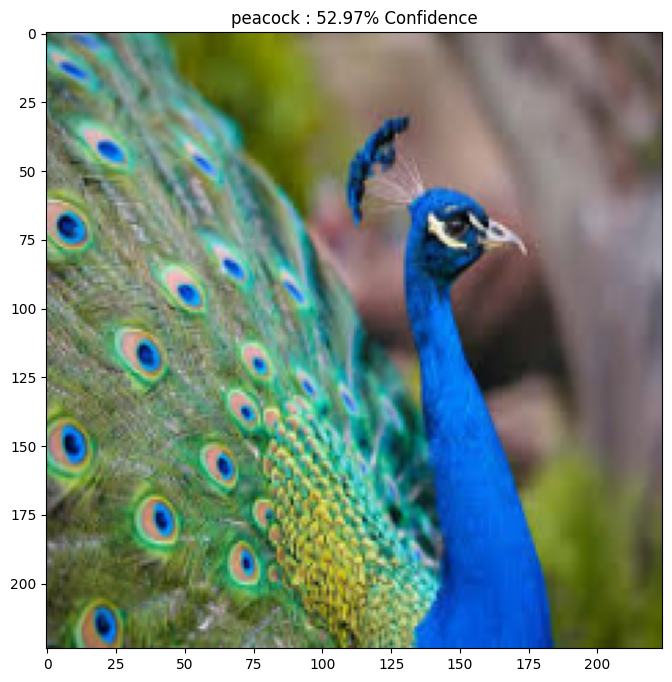

In [ ]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

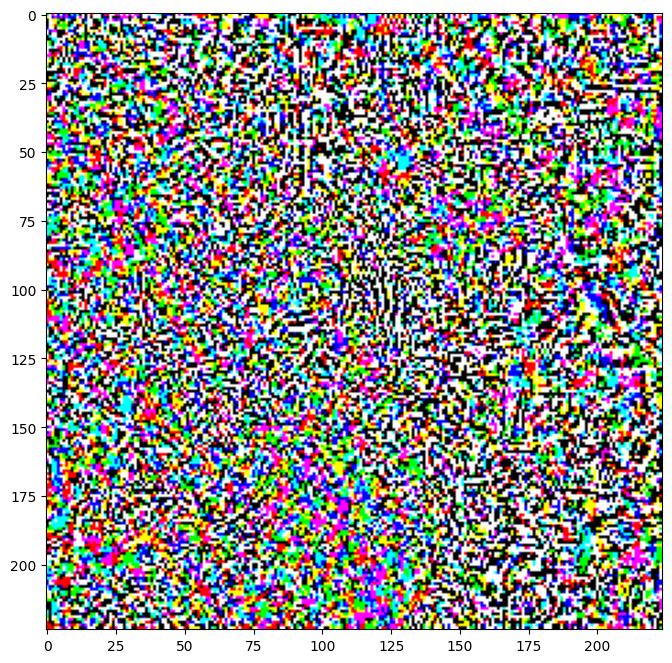

In [ ]:
# Get the input label of the image.
labrador_retriever_index = 208
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [ ]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


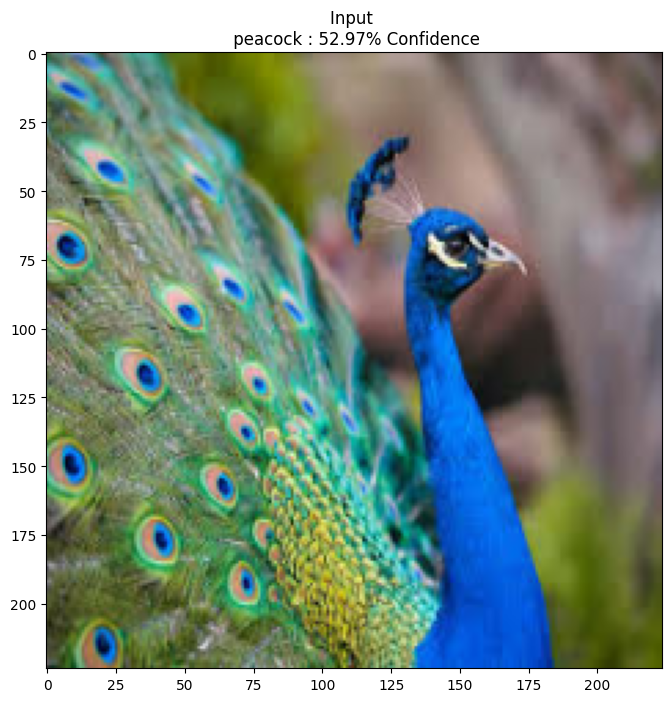

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


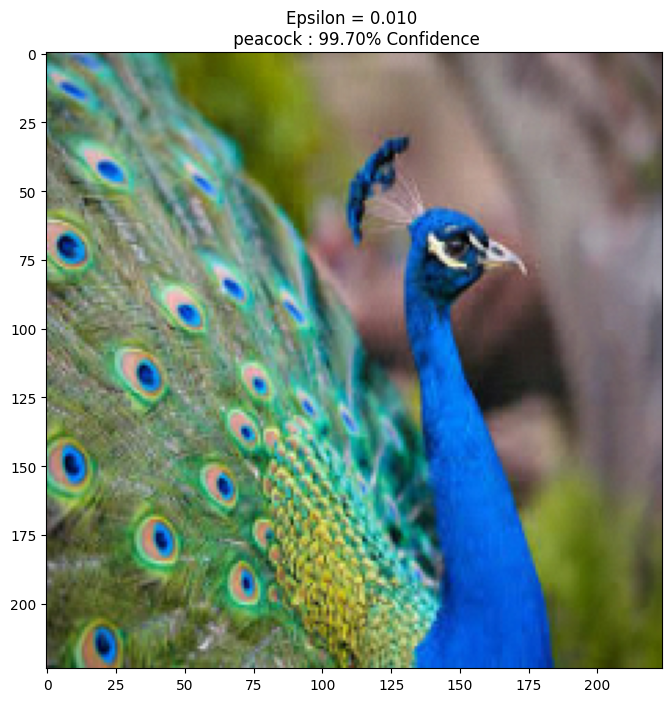

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


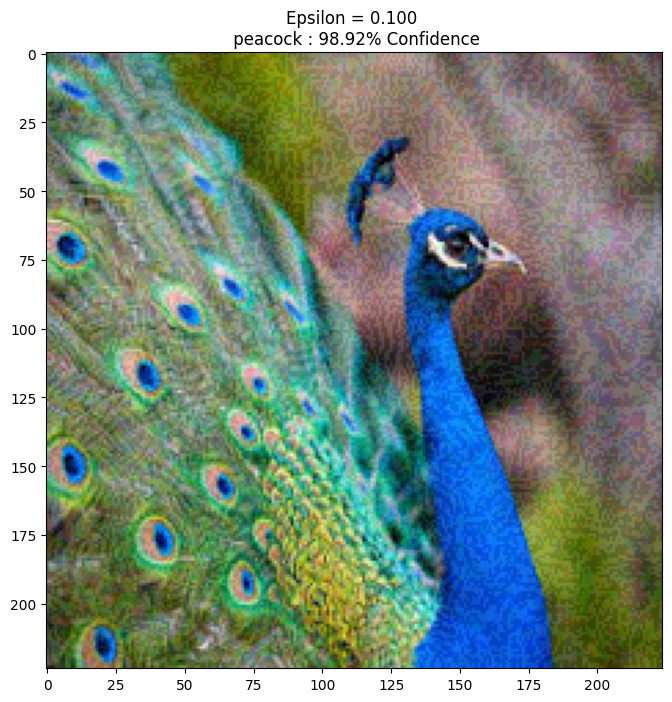

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


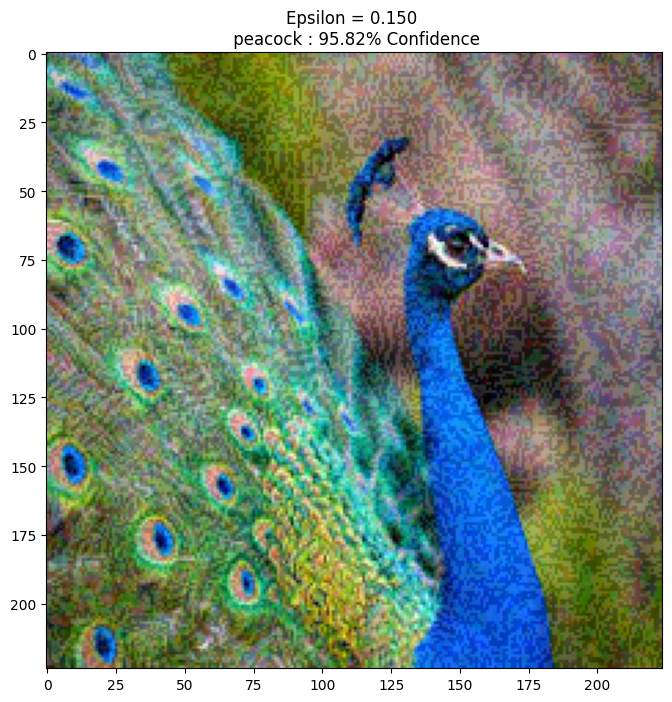

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


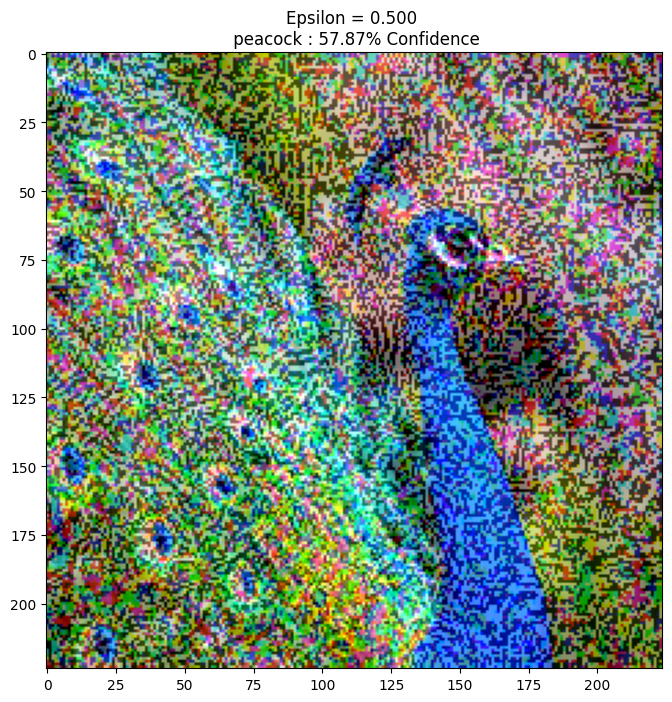

In [ ]:
epsilons = [0, 0.01, 0.1, 0.15, 0.5]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])